In [2]:
import numpy as np
import os
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [4]:
def find_roi_coordinates(pixel_array):
    # Pixel array'deki beyaz piksellerin konumlarını bul
    white_pixels = np.where(pixel_array == 255)

    # ROI'nin koordinatlarını hesapla
    x_min = np.min(white_pixels[1])
    x_max = np.max(white_pixels[1])
    y_min = np.min(white_pixels[0])
    y_max = np.max(white_pixels[0])

    # ROI'nin merkez koordinatlarını ve boyutlarını hesapla
    x_center = (x_min + x_max) / 2 
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    print("ROI max ve min coordinatlar", " xmin: ", x_min, " xmax: ", x_max, " ymin: ", y_min, " ymax: ", y_max)
    print(pixel_array.shape)
    return x_center, y_center, width, height


# Örnek bir DICOM dosyasını yükle
ds = pydicom.dcmread("C:/Users/alt_user/Desktop/data/yolo için deneme raw imagelar/38_left_cc_roi.dcm")

# Pixel array'i al
pixel_array = ds.pixel_array

# ROI'nin koordinatlarını bul
x_center, y_center, width, height = find_roi_coordinates(pixel_array)

# Doğruluğu kontrol etmek için çıktıları yazdır
print("ROI Merkez Koordinatları (x, y):", x_center, y_center)
print("ROI Boyutları (Genişlik, Yükseklik):", width, height)



ROI max ve min coordinatlar  xmin:  288  xmax:  512  ymin:  1976  ymax:  2184
(4616, 3016)
ROI Merkez Koordinatları (x, y): 400.0 2080.0
ROI Boyutları (Genişlik, Yükseklik): 224 208


In [6]:
def get_file_names_in_folder(folder_path):
    file_names = []
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)):
            if(file_name.find("roi")!=-1):
                file_names.append(file_name)
    return file_names

folder_path = 'C:/Users/alt_user/Desktop/data/yolo için deneme raw imagelar'  # Replace this with the path to your folder
file_names = get_file_names_in_folder(folder_path)
print(file_names)

['1079_right_cc_roi.dcm', '1079_right_mlo_roi.dcm', '1407_right_cc_roi.dcm', '1407_right_mlo_roi.dcm', '257_right_cc_roi.dcm', '348_left_cc_roi_.dcm', '348_left_mlo_roi.dcm', '387_right_cc_roi.dcm', '387_right_mlo_roi.dcm', '38_left_cc_roi.dcm', '38_left_mlo_roi.dcm', '858_right_cc_roi1.dcm', '858_right_cc_roi2.dcm', '858_right_mlo_roi1.dcm', '858_right_mlo_roi2.dcm']


In [18]:
fileNameDic={}
for string in file_names:
    ds = pydicom.dcmread("C:/Users/alt_user/Desktop/data/yolo için deneme raw imagelar/"+string)

    # Pixel array'i al
    pixel_array = ds.pixel_array

    # ROI'nin koordinatlarını bul
    x_center, y_center, width, height = find_roi_coordinates(pixel_array)
    splitString=string.split("_")
    fileName=splitString[0]+"_"+splitString[1]+"_"+splitString[2]
    with open(fileName+'.txt', 'a') as file:
        file.write(" "+ str(x_center) +" " + str(y_center)+" " + str(width)+ " " + str(height)+"\n")



ROI max ve min coordinatlar  xmin:  1348  xmax:  1606  ymin:  1511  ymax:  1747
(4520, 2952)
ROI max ve min coordinatlar  xmin:  1365  xmax:  1586  ymin:  2676  ymax:  2966
(4520, 2952)
ROI max ve min coordinatlar  xmin:  2024  xmax:  2344  ymin:  2280  ymax:  2552
(4584, 2840)
ROI max ve min coordinatlar  xmin:  1632  xmax:  1840  ymin:  2752  ymax:  2960
(4584, 2976)
ROI max ve min coordinatlar  xmin:  1744  xmax:  2024  ymin:  2120  ymax:  2368
(4704, 2720)
ROI max ve min coordinatlar  xmin:  1270  xmax:  1450  ymin:  3114  ymax:  3303
(5341, 2251)
ROI max ve min coordinatlar  xmin:  1772  xmax:  1984  ymin:  2711  ymax:  2960
(5491, 2701)
ROI max ve min coordinatlar  xmin:  1775  xmax:  1952  ymin:  2658  ymax:  2843
(4528, 3040)
ROI max ve min coordinatlar  xmin:  1856  xmax:  2083  ymin:  2877  ymax:  3082
(4584, 3008)
ROI max ve min coordinatlar  xmin:  288  xmax:  512  ymin:  1976  ymax:  2184
(4616, 3016)
ROI max ve min coordinatlar  xmin:  560  xmax:  768  ymin:  3816  ymax: 

38 left cc birads 4
257 birads 4
858 birads (1,4) (2,3)
858 mlo (1,3),(2,4)
1407 right 4
348 birads 4
387 birads 4
1079 cc 4
1079 mlo 5(do not use)

In [86]:
#Bu code cell döndürme işlemi için kullanılıyor
def rotate_dicom_images(input_dir, output_dir, angle_range=(-15, 15), step=5):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith('.dcm'):
            dcm_path = os.path.join(input_dir, filename)
            ds = pydicom.dcmread(dcm_path)
            img_array = ds.pixel_array  # DICOM görüntüsünü numpy dizisine dönüştür

            for angle in range(angle_range[0], angle_range[1] + 1, step):
                rotated_img = rotate_image(img_array, angle)
                output_filename = f"{os.path.splitext(filename)[0]}_rotated_{angle}.dcm"
                output_path = os.path.join(output_dir, output_filename)
                save_dicom_image(rotated_img, ds, output_path)


def rotate_image(image, angle):
    height, width = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image


def save_dicom_image(image, original_dicom, output_path):
    original_dicom.PixelData = image.tobytes()
    original_dicom.save_as(output_path)


# Örnek kullanım:
input_directory = "C:/Users/yagizpc/Desktop/inputdon"
output_directory = "C:/Users/yagizpc/Desktop/outputdon"
rotate_dicom_images(input_directory, output_directory)


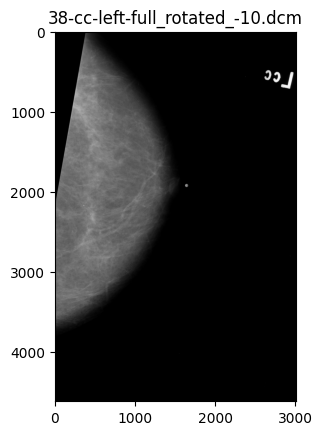

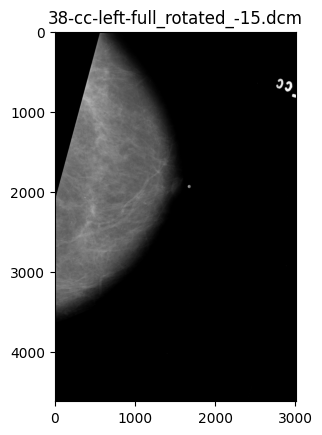

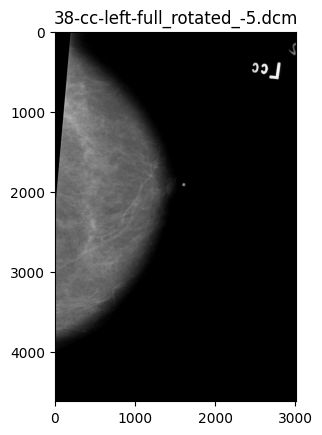

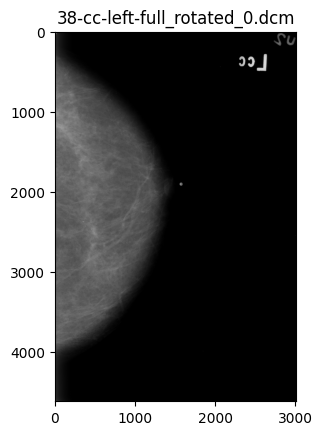

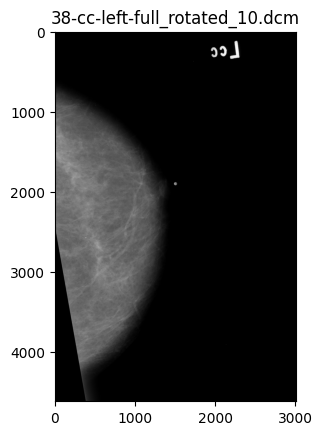

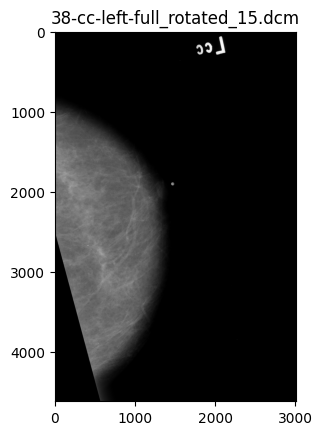

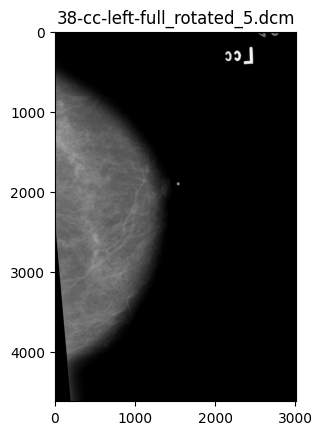

In [87]:

def show_dicom_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.dcm'):
            filepath = os.path.join(folder_path, filename)
            dicom_data = pydicom.dcmread(filepath, force=True)
            plt.imshow(dicom_data.pixel_array, cmap=plt.cm.gray)
            plt.title(filename)
            plt.show()


show_dicom_images(output_directory)


In [111]:
def apply_gaussian_filter(input_folder, output_folder, sigma=1.5):
    # Giriş ve çıkış klasörlerini oluştur
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Giriş klasöründeki DICOM dosyalarını al
    for filename in os.listdir(input_folder):
        if filename.endswith(".dcm"):
            # DICOM dosyasını yükle
            ds = pydicom.dcmread(os.path.join(input_folder, filename))

            # DICOM görüntüsünü piksel verisine dönüştür
            pixel_array = ds.pixel_array

            # Gaussian filtresi kernelini oluştur
            kernel_size = int(6 * sigma + 1)
            kernel = cv2.getGaussianKernel(kernel_size, sigma)
            kernel = np.outer(kernel, kernel.transpose())

            # Filtreyi uygula
            filtered_image = cv2.filter2D(pixel_array, -1, kernel)

            # Yeni dosya adı ve yolunu oluştur
            output_filename = os.path.splitext(filename)[0] + "_augmented.dcm"
            output_path = os.path.join(output_folder, output_filename)

            # Görüntüyü kaydetmek için yeni bir DICOM dosyası oluştur
            ds_augmented = pydicom.dcmread(os.path.join(input_folder, filename))
            ds_augmented.PixelData = filtered_image.tobytes()
            ds_augmented.save_as(output_path)

            print(f"Augmente edilmiş görüntü kaydedildi: {output_path}")


# Giriş ve çıkış klasörlerini belirt
input_folder = input_directory
output_folder = "C:/Users/yagizpc/Desktop/outputgauss"

# Gauss filtresi uygula ve augment edilmiş görüntüleri kaydet
sigma = 3
apply_gaussian_filter(input_folder, output_folder, sigma)


Augmente edilmiş görüntü kaydedildi: C:/Users/yagizpc/Desktop/outputgauss\38-cc-left-full_augmented.dcm


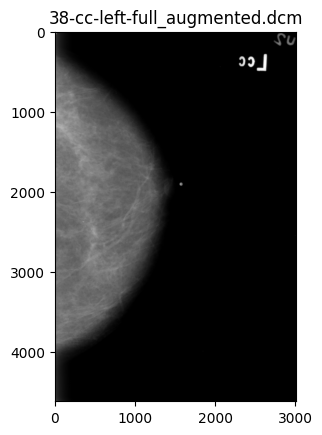

In [112]:
show_dicom_images(output_folder)

In [90]:
#brightness ve contrastı değiştirmek için kod
def adjust_brightness_contrast(input_folder, output_folder, brightness_factor=1.2, contrast_factor=1.2):
    # Giriş ve çıkış klasörlerini kontrol et
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Giriş klasöründeki tüm DICOM dosyalarını işle
    for filename in os.listdir(input_folder):
        if filename.endswith('.dcm'):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder,
                                       filename[:-4] + '_augmented.dcm')  # Çıktı dosyasının adını belirle

            # DICOM görüntüsünü oku
            dicom_img = pydicom.dcmread(input_path)

            # Piksel verisini al
            img = dicom_img.pixel_array

            # Piksel verisini parlaklık ve kontrast faktörlerine göre ayarla
            img = (img * brightness_factor).astype(int)
            img = ((img - 32768) * contrast_factor + 32768).clip(0, 65535).astype(np.uint16)

            # Ayarlanmış piksel verisini DICOM görüntüsüne kaydet
            dicom_img.PixelData = img.tobytes()

            # Yeni boyut bilgisini güncelle
            dicom_img.Rows, dicom_img.Columns = img.shape

            # Çıktıyı kaydet
            dicom_img.save_as(output_path)

            print(f"{input_path} dosyası augment edildi ve {output_path} olarak kaydedildi.")


# Parlaklık ve kontrast ayar faktörlerini belirle
brightness_factor = 1.5
contrast_factor = 1.5

# Ayarları uygula
adjust_brightness_contrast(input_folder, output_folder, brightness_factor, contrast_factor)

# Giriş ve çıkış klasörlerini belirle
input_folder = input_directory
output_folder = "C:/Users/yagizpc/Desktop/outputbright"

# Ayarları uygula
adjust_brightness_contrast(input_folder, output_folder, brightness_factor, contrast_factor)


C:/Users/yagizpc/Desktop/inputdon\38-cc-left-full.dcm dosyası augment edildi ve C:/Users/yagizpc/Desktop/outputgauss\38-cc-left-full_augmented.dcm olarak kaydedildi.
C:/Users/yagizpc/Desktop/inputdon\38-cc-left-full.dcm dosyası augment edildi ve C:/Users/yagizpc/Desktop/outputbright\38-cc-left-full_augmented.dcm olarak kaydedildi.


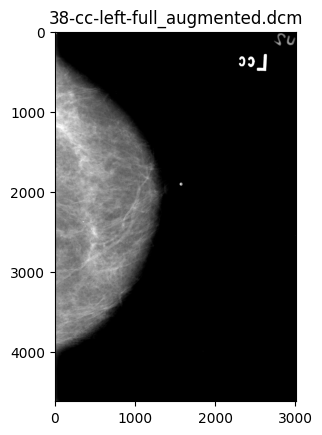

In [91]:
show_dicom_images(output_folder)

In [92]:
count = 1


def crop_and_save_dicom(input_folder, output_folder, crop_size=(256, 256)):
    global count
    # Giriş klasöründe yer alan tüm DICOM dosyalarını al
    for filename in os.listdir(input_folder):
        if filename.endswith('.dcm'):
            # DICOM dosyasını yükle
            dcm_path = os.path.join(input_folder, filename)
            ds = pydicom.dcmread(dcm_path)

            # DICOM görüntüsünü numpy dizisine dönüştür
            img = ds.pixel_array

            # Görüntüyü kesme veya kırpmayı uygula
            if img.shape[0] >= crop_size[0] and img.shape[1] >= crop_size[1]:
                start_x = np.random.randint(0, img.shape[0] - crop_size[0])
                start_y = np.random.randint(0, img.shape[1] - crop_size[1])
                cropped_img = img[start_x:start_x + crop_size[0], start_y:start_y + crop_size[1]]
            else:
                print("Görüntü, belirtilen boyutlardan küçük olduğu için kırpmaya uygun değil:", filename)
                continue

            # Kırpılmış görüntüyü yeni bir DICOM nesnesi olarak oluştur
            cropped_ds = pydicom.Dataset()
            cropped_ds.update(ds)  # Ana veri setinden bilgileri kopyala
            cropped_ds.file_meta = pydicom.Dataset()  # Meta bilgiler için yeni bir dataset oluştur
            cropped_ds.file_meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian  # Transfer syntax ayarı
            cropped_ds.PixelData = cropped_img.tobytes()
            cropped_ds.Rows, cropped_ds.Columns = crop_size

            # Yeni görüntüyü kaydet
            output_filename = os.path.splitext(filename)[0] + f'_cropped{count}.dcm'
            count += 1
            output_path = os.path.join(output_folder, output_filename)
            pydicom.filewriter.write_file(output_path, cropped_ds)

            print("Görüntü başarıyla işlendi:", filename)


# Kullanım örneği
input_folder = input_directory
output_folder = "C:/Users/yagizpc/Desktop/outputkes"
crop_size = (500, 500)  # Kırpılacak veya kesilecek boyut
for i in range(1, 5):
    crop_and_save_dicom(input_folder, output_folder, crop_size)

Görüntü başarıyla işlendi: 38-cc-left-full.dcm
Görüntü başarıyla işlendi: 38-cc-left-full.dcm
Görüntü başarıyla işlendi: 38-cc-left-full.dcm
Görüntü başarıyla işlendi: 38-cc-left-full.dcm


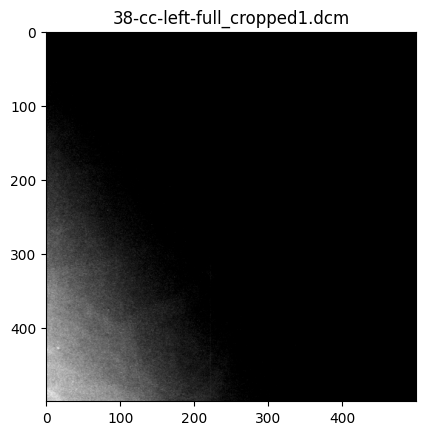

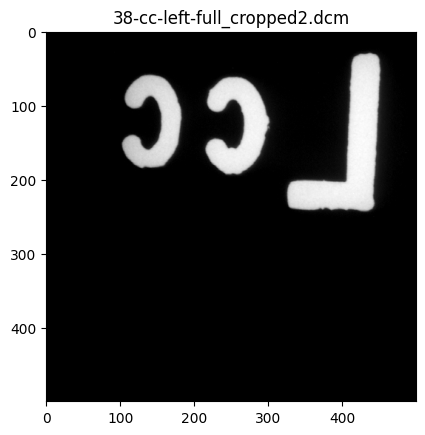

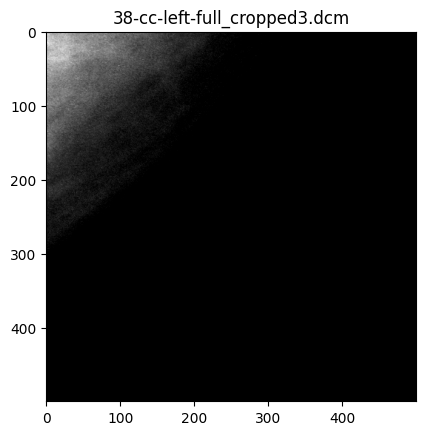

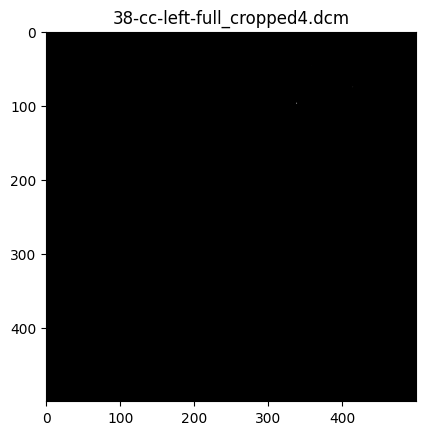

In [93]:
show_dicom_images(output_folder)

In [94]:
from pydicom.dataset import Dataset


def apply_symmetry(input_folder, output_folder):
    # Giriş klasöründeki tüm DICOM dosyalarını listele
    dicom_files = [f for f in os.listdir(input_folder) if f.endswith('.dcm')]

    for file_name in dicom_files:
        # Giriş dosyasını oku
        dicom_path = os.path.join(input_folder, file_name)
        dicom_data = pydicom.dcmread(dicom_path)

        # DICOM piksel verilerini numpy dizisine dönüştür
        dicom_array = apply_voi_lut(dicom_data.pixel_array, dicom_data)

        # Yatay simetri uygula
        horizontal_flip = dicom_array[:, ::-1]
        # Dikey simetri uygula
        vertical_flip = dicom_array[::-1, :].copy()

        # Yatay simetri için yeni bir DICOM dosyası oluştur
        horizontal_output_path = os.path.join(output_folder, f"horizontal_{file_name}")
        horizontal_output_file = dicom_data.copy()  # Meta verileri kopyala
        horizontal_output_file.PixelData = horizontal_flip.tobytes()
        horizontal_output_file.save_as(horizontal_output_path)

        # Dikey simetri için yeni bir DICOM dosyası oluştur
        vertical_output_path = os.path.join(output_folder, f"vertical_{file_name}")
        vertical_output_file = dicom_data.copy()  # Meta verileri kopyala
        vertical_output_file.PixelData = vertical_flip.tobytes()
        vertical_output_file.save_as(vertical_output_path)

        # Yatay ve dikey simetriyi içeren yeni bir DICOM dosyası oluştur
        both_output_path = os.path.join(output_folder, f"both_{file_name}")
        both_output_file = dicom_data.copy()  # Meta verileri kopyala
        both_output_file.PixelData = (
            horizontal_flip[::-1, :] if horizontal_flip.shape[0] > vertical_flip.shape[0] else vertical_flip[:,
                                                                                               ::-1]).tobytes()
        both_output_file.save_as(both_output_path)

        print(f"{file_name} augmentasyon işlemi tamamlandı.")


# Giriş ve çıkış klasörlerini belirt
input_folder = input_directory
output_folder = "C:/Users/yagizpc/Desktop/outputflip"

# Dönüş uygula ve çıktıları kaydet
apply_symmetry(input_folder, output_folder)

38-cc-left-full.dcm augmentasyon işlemi tamamlandı.


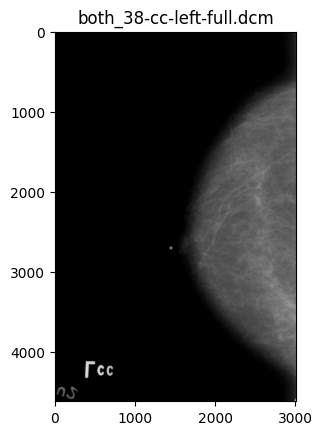

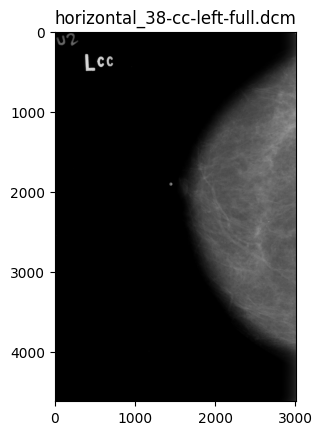

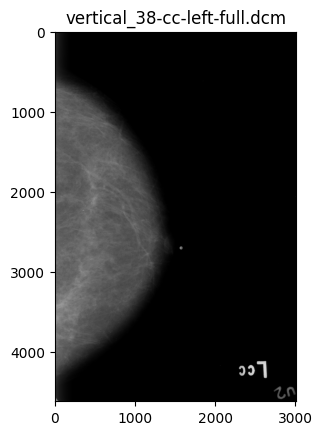

In [95]:
show_dicom_images(output_folder)